Here we import libraries and api data for makerdao balance sheet

In [96]:
import import_ipynb
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import yfinance as yf
import streamlit as st

# Set the float display format to suppress scientific notation
#pd.set_option('display.float_format', lambda x: '%.3f' % x)





makerdao revenue statement 

In [97]:
from apis import monthly_stats

monthly_stats.tail()



,expenses,lending_income,liquidation_income,month,net_income,trading_income,value,year
period,,,,,,,,
2023-08,-1.001199e+07,1.973730e+07,467517.145693,144,1.019283e+07,0.0,2.110152e+10,36414
2023-09,-3.214414e+06,7.465823e+06,21917.751173,162,4.273326e+06,0.0,2.214130e+10,36414
2023-10,-7.704920e+06,2.648128e+07,0.000000,180,1.877636e+07,0.0,2.140264e+10,36414
2023-11,-5.948604e+06,4.657850e+07,910.052544,198,4.063081e+07,0.0,2.141557e+10,36414
2023-12,-2.760674e+06,5.233887e+06,0.000000,216,2.473213e+06,0.0,2.105041e+10,36414


In [98]:
var_in_cf = monthly_stats['net_income'].pct_change()

# Perform operation and assign to a new variable
cleaned_var_in_cf = pd.DataFrame(var_in_cf.iloc[:-1].dropna())

# Use 'cleaned_var_in_cf' for further operations

cleaned_var_in_cf['net_income'].tail() 

period
2023-07   -1.340206
2023-08   -6.350414
2023-09   -0.580752
2023-10    3.393852
2023-11    1.163934
Name: net_income, dtype: float64

In [99]:
from formulas import month_to_quarter
from apis import revdf

revdf['quarter'] = revdf['month'].apply(month_to_quarter)

In [100]:
quarterly_stats = revdf.groupby(['year', 'quarter']).sum().reset_index()
last_four_quarters = quarterly_stats.iloc[-4:]
ttm_data = last_four_quarters.sum()

ttm_revenue = ttm_data['lending_income'] + ttm_data['liquidation_income'] + ttm_data['trading_income']

C:\Users\brand\AppData\Local\Temp\ipykernel_20256\556625814.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_stats = revdf.groupby(['year', 'quarter']).sum().reset_index()


HERE is the API for maker price data

In [101]:
from apis import mkrdao

accounts = mkrdao['item'].unique()

print(accounts)


['Crypto-Loans' 'Real-World Assets' 'Stablecoins' 'Others assets' 'DSR'
 'DAI' 'Equity']


In [102]:
cryptoloans = mkrdao.where(mkrdao['item'].isin(['Crypto-Loans'])).dropna().groupby('period').sum()
rwa = mkrdao.where(mkrdao['item'].isin(['Real-World Assets'])).dropna().groupby('period').sum()
stablecoins = mkrdao.where(mkrdao['item'].isin(['Stablecoins'])).dropna().groupby('period').sum()
otherassets = mkrdao.where(mkrdao['item'].isin(['Others assets'])).dropna().groupby('period').sum()
dsr = mkrdao.where(mkrdao['item'].isin(['DSR'])).dropna().groupby('period').sum()
dai = mkrdao.where(mkrdao['item'].isin(['DAI'])).dropna().groupby('period').sum()
mkrequity = mkrdao.where(mkrdao['item'].isin(['Equity'])).dropna().groupby('period').sum()

#Most recent crypto loan balances 
rwa.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_20256\1803158308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cryptoloans = mkrdao.where(mkrdao['item'].isin(['Crypto-Loans'])).dropna().groupby('period').sum()
C:\Users\brand\AppData\Local\Temp\ipykernel_20256\1803158308.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rwa = mkrdao.where(mkrdao['item'].isin(['Real-World Assets'])).dropna().groupby('period').sum()
C:\Users\brand\AppData\Local\Temp\ipykernel_20256\1803158308.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will d

,balance,normalized
period,,
2021-04-21 00:00:00.000,35913.219169,0.00001
2021-04-22 00:00:00.000,35913.219169,0.00001
2021-04-23 00:00:00.000,35913.219202,0.00001
2021-04-24 00:00:00.000,35913.219202,0.00001
2021-04-25 00:00:00.000,35913.219202,0.00001


In [103]:
assets = cryptoloans['balance'].fillna(0) + rwa['balance'].fillna(0) + stablecoins['balance'].fillna(0) + otherassets['balance'].fillna(0)
liabilities = dsr['balance'] + dai['balance']
equity = mkrequity['balance']


equity

period
2020-07-01 00:00:00.000   -2.001587e+05
2020-07-02 00:00:00.000   -2.018485e+05
2020-07-03 00:00:00.000   -2.040243e+05
2020-07-04 00:00:00.000   -2.064341e+05
2020-07-05 00:00:00.000   -2.094354e+05
                               ...     
2023-12-21 00:00:00.000   -5.568678e+07
2023-12-22 00:00:00.000   -5.545380e+07
2023-12-23 00:00:00.000   -5.520164e+07
2023-12-24 00:00:00.000   -5.518739e+07
2023-12-25 00:00:00.000   -5.523120e+07
Name: balance, Length: 1273, dtype: float64

In [104]:
ttm_data

year                                 8092
quarter                          Q1Q2Q3Q4
expenses                 -74118554.391347
lending_income           139631926.405038
liquidation_income          752182.063317
month                                1404
net_income                 66509403.16049
trading_income              243849.083482
value                 245635468353.169922
dtype: object

In [105]:
from apis import supply, current_price, market_value

bookval = abs(equity) / supply

market_to_book = current_price / bookval

print(market_to_book)

period
2020-07-01 00:00:00.000    6594.203169
2020-07-02 00:00:00.000    6538.998696
2020-07-03 00:00:00.000    6469.263870
2020-07-04 00:00:00.000    6393.747063
2020-07-05 00:00:00.000    6302.119052
                              ...     
2023-12-21 00:00:00.000      23.701982
2023-12-22 00:00:00.000      23.801562
2023-12-23 00:00:00.000      23.910289
2023-12-24 00:00:00.000      23.916460
2023-12-25 00:00:00.000      23.897489
Name: balance, Length: 1273, dtype: float64


In [106]:
from apis import mkrsupply_df, historical_mk, mkr_history
#monthly_stats

historical_mk



,date,marketcap
0,2020-10-31 00:00:00,4.737257e+08
1,2020-11-01 00:00:00,4.765544e+08
2,2020-11-02 00:00:00,4.897439e+08
3,2020-11-03 00:00:00,4.769644e+08
4,2020-11-04 00:00:00,4.726956e+08
...,...,...
1148,2023-12-23 00:00:00,1.278593e+09
1149,2023-12-24 00:00:00,1.272140e+09
1150,2023-12-25 00:00:00,1.283671e+09
1151,2023-12-26 00:00:00,1.293997e+09


In [107]:
historical_mk['date'] = pd.to_datetime(historical_mk['date'], unit='ms')
historical_mk

,date,marketcap
0,2020-10-31 00:00:00,4.737257e+08
1,2020-11-01 00:00:00,4.765544e+08
2,2020-11-02 00:00:00,4.897439e+08
3,2020-11-03 00:00:00,4.769644e+08
4,2020-11-04 00:00:00,4.726956e+08
...,...,...
1148,2023-12-23 00:00:00,1.278593e+09
1149,2023-12-24 00:00:00,1.272140e+09
1150,2023-12-25 00:00:00,1.283671e+09
1151,2023-12-26 00:00:00,1.293997e+09


In [108]:
historical_supply =  historical_mk['marketcap'] / mkr_history['price']
historical_supply.index = historical_mk['date']

In [109]:
mkr_history

,date,price,daily_returns
1,2020-11-01 00:00:00,523.558507,0.009784
2,2020-11-02 00:00:00,538.866881,0.029239
3,2020-11-03 00:00:00,523.434663,-0.028638
4,2020-11-04 00:00:00,521.372827,-0.003939
5,2020-11-05 00:00:00,520.993567,-0.000727
...,...,...,...
1148,2023-12-23 00:00:00,1390.922025,0.052055
1149,2023-12-24 00:00:00,1383.103655,-0.005621
1150,2023-12-25 00:00:00,1396.735641,0.009856
1151,2023-12-26 00:00:00,1406.249792,0.006812


In [44]:
historical_supply_clean = historical_supply.dropna()

historical_supply_clean

date
2020-11-01 00:00:00    910221.855172
2020-11-02 00:00:00    908840.221688
2020-11-03 00:00:00    911220.495852
2020-11-04 00:00:00    906636.435117
2020-11-05 00:00:00    908762.762613
                           ...      
2023-12-23 00:00:00    919241.218129
2023-12-24 00:00:00    919771.637678
2023-12-25 00:00:00    919050.979180
2023-12-26 00:00:00    920176.068145
2023-12-26 16:10:34    919255.905786
Length: 1152, dtype: float64

In [45]:
filtered_equity = abs(equity[equity.index > '2020-10-28'])

new_filtered_equity = pd.DataFrame(filtered_equity)
new_historical_supply = pd.DataFrame(historical_supply_clean)

In [46]:
filtered_equity

period
2020-10-28 00:00:00.000    2.141101e+06
2020-10-29 00:00:00.000    2.196364e+06
2020-10-30 00:00:00.000    2.286308e+06
2020-10-31 00:00:00.000    2.371681e+06
2020-11-01 00:00:00.000    2.461084e+06
                               ...     
2023-12-21 00:00:00.000    5.568678e+07
2023-12-22 00:00:00.000    5.545380e+07
2023-12-23 00:00:00.000    5.520164e+07
2023-12-24 00:00:00.000    5.518739e+07
2023-12-25 00:00:00.000    5.523120e+07
Name: balance, Length: 1154, dtype: float64

In [47]:
historical_supply_clean

date
2020-11-01 00:00:00    910221.855172
2020-11-02 00:00:00    908840.221688
2020-11-03 00:00:00    911220.495852
2020-11-04 00:00:00    906636.435117
2020-11-05 00:00:00    908762.762613
                           ...      
2023-12-23 00:00:00    919241.218129
2023-12-24 00:00:00    919771.637678
2023-12-25 00:00:00    919050.979180
2023-12-26 00:00:00    920176.068145
2023-12-26 16:10:34    919255.905786
Length: 1152, dtype: float64

In [48]:
import pandas as pd

# Assuming filtered_equity and historical_supply_clean are already loaded

# Standardize the datetime indices to a common format
filtered_equity.index = pd.to_datetime(filtered_equity.index).normalize()
historical_supply_clean.index = pd.to_datetime(historical_supply_clean.index).normalize()

# Perform a left merge on the index
metrics = filtered_equity.to_frame(name='equity').merge(historical_supply_clean.to_frame(name='supply'), 
                                                        left_index=True, right_index=True, 
                                                        how='left')

# Display the merged DataFrame

metrics

,equity,supply
2020-10-28,2.141101e+06,NaN
2020-10-29,2.196364e+06,NaN
2020-10-30,2.286308e+06,NaN
2020-10-31,2.371681e+06,NaN
2020-11-01,2.461084e+06,910221.855172
...,...,...
2023-12-21,5.568678e+07,918435.849913
2023-12-22,5.545380e+07,919165.546403
2023-12-23,5.520164e+07,919241.218129
2023-12-24,5.518739e+07,919771.637678


In [49]:
metrics['bookval'] = metrics['equity'] / metrics['supply']
metrics

,equity,supply,bookval
2020-10-28,2.141101e+06,NaN,NaN
2020-10-29,2.196364e+06,NaN,NaN
2020-10-30,2.286308e+06,NaN,NaN
2020-10-31,2.371681e+06,NaN,NaN
2020-11-01,2.461084e+06,910221.855172,2.703829
...,...,...,...
2023-12-21,5.568678e+07,918435.849913,60.632196
2023-12-22,5.545380e+07,919165.546403,60.330593
2023-12-23,5.520164e+07,919241.218129,60.051310
2023-12-24,5.518739e+07,919771.637678,60.001192


In [50]:
mkrsupply_df['balance'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 181 entries, 2023-12-16 00:00:00+00:00 to 2023-06-19 00:00:00+00:00
Series name: balance
Non-Null Count  Dtype  
--------------  -----  
181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [51]:
equity.info()


<class 'pandas.core.series.Series'>
Index: 1273 entries, 2020-07-01 00:00:00.000 to 2023-12-25 00:00:00.000
Series name: balance
Non-Null Count  Dtype  
--------------  -----  
1273 non-null   float64
dtypes: float64(1)
memory usage: 52.2+ KB


In [52]:
from apis import ttm_supply

ttm_net_income = ttm_data['net_income']

eps = ttm_net_income / ttm_supply

print(eps)

73.41571070174464


In [53]:
# Ensure the index is a DateTimeIndex
#metrics.index = pd.to_datetime(metrics.index.start_time)

# Group by month and calculate averages
monthly_averages = metrics.resample('M').mean()

# Display the resulting DataFrame
print(monthly_averages)


                  equity         supply    bookval
2020-10-31  2.248864e+06            NaN        NaN
2020-11-30  3.501016e+06  909439.212415   3.850017
2020-12-31  4.003503e+06  905718.304111   4.420283
2021-01-31  4.310946e+06  901603.814669   4.781478
2021-02-28  7.837552e+06  900590.252118   8.704910
2021-03-31  1.531653e+07  902701.360606  16.967558
2021-04-30  2.463653e+07  901855.121624  27.316706
2021-05-31  3.452583e+07  902469.913467  38.258058
2021-06-30  4.318891e+07  901975.090831  47.883018
2021-07-31  4.879691e+07  901054.729233  54.155211
2021-08-31  5.056938e+07  900549.552265  56.155669
2021-09-30  5.203712e+07  901412.822546  57.727498
2021-10-31  5.562173e+07  901147.179609  61.723692
2021-11-30  5.911457e+07  900688.593165  65.632471
2021-12-31  6.227001e+07  901315.797696  69.088080
2022-01-31  6.627639e+07  901437.660284  73.523980
2022-02-28  6.224101e+07  901307.227479  69.054454
2022-03-31  6.624369e+07  902581.927325  73.397120
2022-04-30  6.806569e+07  90075

In [54]:
hist_net_income = monthly_stats['net_income'].to_frame()
hist_net_income.index = pd.to_datetime(hist_net_income.index)
#hist_net_income
hist_net_income.tail()

,net_income
period,
2023-08-01,1.019283e+07
2023-09-01,4.273326e+06
2023-10-01,1.877636e+07
2023-11-01,4.063081e+07
2023-12-01,2.473213e+06


In [55]:
# Drop the specified columns from the DataFrame
#metrics = metrics.drop(columns=['net income_x', 'net income_y', 'net income'])
hist_price = mkr_history['price'].to_frame()
hist_price.index = mkr_history['date']


In [56]:
# Display the DataFrame after dropping the columns
hist_price.index = mkr_history['date']
hist_price.index = hist_price.index.normalize()
#metrics['eps'] = metrics['net_income'] / metrics['supply']
metrics.index = pd.to_datetime(metrics.index)
print(metrics.index)
print(hist_price.index)

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06',
               ...
               '2023-12-16', '2023-12-17', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25'],
              dtype='datetime64[ns]', length=1154, freq=None)
DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-26'],
              dtype='datetime64[ns]', name='date', length=1152, freq=None)


In [57]:
# Resample to get the month-end closing price
monthly_closing_price = hist_price.resample('M').last()

# Display the resulting DataFrame



In [58]:
metricsfiltered3 = monthly_averages.merge(monthly_closing_price, left_index=True, right_index=True, how='left')
metricsfiltered3.tail()


,equity,supply,bookval,price
2023-08-31,5.635233e+07,901129.334154,62.534283,1044.043328
2023-09-30,5.019345e+07,901029.310501,55.707059,1450.725189
2023-10-31,5.075603e+07,900777.882719,56.347374,1393.573367
2023-11-30,5.512987e+07,905481.106484,60.876291,1519.720468
2023-12-31,5.571835e+07,918659.316211,60.652016,1429.013120


In [59]:
hist_net_income.tail()

,net_income
period,
2023-08-01,1.019283e+07
2023-09-01,4.273326e+06
2023-10-01,1.877636e+07
2023-11-01,4.063081e+07
2023-12-01,2.473213e+06


In [60]:
# Adjust hist_net_income index to end-of-month
hist_net_income.index = hist_net_income.index + pd.offsets.MonthEnd(0)

# Merge the DataFrames
mf4 = metricsfiltered3.merge(hist_net_income, left_index=True, right_index=True, how='left')

mf4['eps'] = mf4['net_income'] / mf4['supply']
mf4['price_to_earnings'] = mf4['price'] / mf4['eps']
mf4['roe'] = mf4['net_income'] / mf4['equity']
# Display the merged DataFrame
print(mf4)


                  equity         supply    bookval        price    net_income  \
2020-10-31  2.248864e+06            NaN        NaN          NaN  4.924139e+06   
2020-11-30  3.501016e+06  909439.212415   3.850017   544.441375  5.482194e+06   
2020-12-31  4.003503e+06  905718.304111   4.420283   576.399341  4.264751e+06   
2021-01-31  4.310946e+06  901603.814669   4.781478  1576.862980  6.108469e+06   
2021-02-28  7.837552e+06  900590.252118   8.704910  1998.421053  1.309423e+07   
2021-03-31  1.531653e+07  902701.360606  16.967558  2089.585810  1.745882e+07   
2021-04-30  2.463653e+07  901855.121624  27.316706  4268.045186  2.135812e+07   
2021-05-31  3.452583e+07  902469.913467  38.258058  3309.097200  4.466481e+07   
2021-06-30  4.318891e+07  901975.090831  47.883018  2417.036898  1.817395e+07   
2021-07-31  4.879691e+07  901054.729233  54.155211  2914.107727  4.513031e+06   
2021-08-31  5.056938e+07  900549.552265  56.155669  3362.213365  1.684364e+06   
2021-09-30  5.203712e+07  90

In [61]:
# Assuming 'period' is a DatetimeIndex in all dataframes

# Step 1: Create a comprehensive index
all_dates = cryptoloans.index.union(rwa.index).union(stablecoins.index).union(otherassets.index)

# Step 2: Reindex each dataframe
cryptoloans_reindexed = cryptoloans.reindex(all_dates).fillna(0)
rwa_reindexed = rwa.reindex(all_dates).fillna(0)
stablecoins_reindexed = stablecoins.reindex(all_dates).fillna(0)
otherassets_reindexed = otherassets.reindex(all_dates).fillna(0)

# Step 3: Perform the addition
assets = cryptoloans_reindexed['balance'] + rwa_reindexed['balance'] + stablecoins_reindexed['balance'] + otherassets_reindexed['balance']

# Verify the results
print(assets)


period
2020-07-01 00:00:00.000    1.448054e+08
2020-07-02 00:00:00.000    1.498251e+08
2020-07-03 00:00:00.000    1.612606e+08
2020-07-04 00:00:00.000    1.698664e+08
2020-07-05 00:00:00.000    1.733122e+08
                               ...     
2023-12-21 00:00:00.000    5.288569e+09
2023-12-22 00:00:00.000    5.302613e+09
2023-12-23 00:00:00.000    5.328895e+09
2023-12-24 00:00:00.000    5.328486e+09
2023-12-25 00:00:00.000    5.328537e+09
Name: balance, Length: 1273, dtype: float64


In [62]:
assets.index = pd.to_datetime(assets.index)
assets = assets.resample('M').mean()

In [63]:
mf5 = mf4.merge(assets, left_index=True, right_index=True, how='left')

mf5 = mf5.rename(columns={'balance': 'average_assets'})


In [64]:
mf5['roa'] = mf5['net_income'] / mf5['average_assets']
mf5

,equity,supply,bookval,price,net_income,eps,price_to_earnings,roe,average_assets,roa
2020-10-31,2.248864e+06,NaN,NaN,NaN,4.924139e+06,NaN,NaN,2.189612,9.027319e+08,0.005455
2020-11-30,3.501016e+06,909439.212415,3.850017,544.441375,5.482194e+06,6.028104,90.317182,1.565886,9.897468e+08,0.005539
2020-12-31,4.003503e+06,905718.304111,4.420283,576.399341,4.264751e+06,4.708695,122.411707,1.065255,1.099184e+09,0.003880
2021-01-31,4.310946e+06,901603.814669,4.781478,1576.862980,6.108469e+06,6.775115,232.743357,1.416967,1.414911e+09,0.004317
2021-02-28,7.837552e+06,900590.252118,8.704910,1998.421053,1.309423e+07,14.539612,137.446655,1.670704,2.079863e+09,0.006296
2021-03-31,1.531653e+07,902701.360606,16.967558,2089.585810,1.745882e+07,19.340642,108.041184,1.139868,2.748360e+09,0.006352
2021-04-30,2.463653e+07,901855.121624,27.316706,4268.045186,2.135812e+07,23.682424,180.219947,0.866929,3.398175e+09,0.006285
2021-05-31,3.452583e+07,902469.913467,38.258058,3309.097200,4.466481e+07,49.491749,66.861593,1.293664,4.474431e+09,0.009982
2021-06-30,4.318891e+07,901975.090831,47.883018,2417.036898,1.817395e+07,20.149060,119.957801,0.420801,4.971685e+09,0.003655
2021-07-31,4.879691e+07,901054.729233,54.155211,2914.107727,4.513031e+06,5.008609,581.819743,0.092486,5.375861e+09,0.000839


In [65]:
price_to_earnings = current_price/eps

print(price_to_earnings)

19.565294489015493


In [66]:
ROE = ttm_net_income / abs(equity)

print(ROE)

period
2020-07-01 00:00:00.000    332.283354
2020-07-02 00:00:00.000    329.501588
2020-07-03 00:00:00.000    325.987635
2020-07-04 00:00:00.000    322.182326
2020-07-05 00:00:00.000    317.565171
                              ...    
2023-12-21 00:00:00.000      1.194348
2023-12-22 00:00:00.000      1.199366
2023-12-23 00:00:00.000      1.204845
2023-12-24 00:00:00.000      1.205156
2023-12-25 00:00:00.000      1.204200
Name: balance, Length: 1273, dtype: float64


In [67]:
ROA = ttm_net_income / assets

print(ROA)

period
2020-07-31    0.301865
2020-08-31    0.160531
2020-09-30    0.103474
2020-10-31    0.073676
2020-11-30    0.067198
2020-12-31    0.060508
2021-01-31    0.047006
2021-02-28    0.031978
2021-03-31    0.024200
2021-04-30    0.019572
2021-05-31    0.014864
2021-06-30    0.013378
2021-07-31    0.012372
2021-08-31    0.011457
2021-09-30    0.010513
2021-10-31    0.009415
2021-11-30    0.007743
2021-12-31    0.007330
2022-01-31    0.007147
2022-02-28    0.006832
2022-03-31    0.006981
2022-04-30    0.007451
2022-05-31    0.009782
2022-06-30    0.010260
2022-07-31    0.009851
2022-08-31    0.009717
2022-09-30    0.010202
2022-10-31    0.010872
2022-11-30    0.012027
2022-12-31    0.012699
2023-01-31    0.012776
2023-02-28    0.012764
2023-03-31    0.012083
2023-04-30    0.012994
2023-05-31    0.013747
2023-06-30    0.014184
2023-07-31    0.014442
2023-08-31    0.013082
2023-09-30    0.012285
2023-10-31    0.012019
2023-11-30    0.012476
2023-12-31    0.012487
Freq: M, Name: balance, dty

In [68]:
debt_to_equity = abs(liabilities) / abs(equity)

print(debt_to_equity)

period
2020-07-01 00:00:00.000    722.452867
2020-07-02 00:00:00.000    741.264998
2020-07-03 00:00:00.000    789.399159
2020-07-04 00:00:00.000    821.860525
2020-07-05 00:00:00.000    826.520687
                              ...    
2023-12-21 00:00:00.000     93.969921
2023-12-22 00:00:00.000     94.622166
2023-12-23 00:00:00.000     95.535082
2023-12-24 00:00:00.000     95.552600
2023-12-25 00:00:00.000     95.476928
Name: balance, Length: 1273, dtype: float64


In [69]:
debt_to_equity.index = pd.to_datetime(debt_to_equity.index)
debt_to_equity = debt_to_equity.resample('M').mean()
mf6 = mf5.merge(debt_to_equity, left_index=True, right_index=True, how='left')
mf6 = mf6.rename(columns={'balance':'debt_to_equity'})


In [70]:
liabilities.index = pd.to_datetime(liabilities.index)
monthly_liabilities = liabilities.resample('M').mean()


In [71]:
debt_ratio = abs(monthly_liabilities) / assets

mf7 = mf6.merge(debt_ratio, left_index=True, right_index=True, how='left')
mf7 = mf7.rename(columns={'balance':'debt_ratio'})

In [72]:
print(accounts)



['Crypto-Loans' 'Real-World Assets' 'Stablecoins' 'Others assets' 'DSR'
 'DAI' 'Equity']


In [73]:


# Step 3: Perform the addition
current_assets = cryptoloans_reindexed['balance'] + stablecoins_reindexed['balance'] + otherassets_reindexed['balance']

current_liabilities = dai['balance'] + dsr['balance']

current_ratio = current_assets / abs(current_liabilities)

current_ratio.index = pd.to_datetime(current_ratio.index)
current_ratio = current_ratio.resample('M').mean()
mf8 = mf7.merge(current_ratio, left_index=True, right_index=True, how='left')
mf8 = mf8.rename(columns={'balance':'current_ratio'})

mf8

,equity,supply,bookval,price,net_income,eps,price_to_earnings,roe,average_assets,roa,debt_to_equity,debt_ratio,current_ratio
2020-10-31,2.248864e+06,NaN,NaN,NaN,4.924139e+06,NaN,NaN,2.189612,9.027319e+08,0.005455,464.939412,0.997833,1.002168
2020-11-30,3.501016e+06,909439.212415,3.850017,544.441375,5.482194e+06,6.028104,90.317182,1.565886,9.897468e+08,0.005539,287.671039,0.996463,1.003537
2020-12-31,4.003503e+06,905718.304111,4.420283,576.399341,4.264751e+06,4.708695,122.411707,1.065255,1.099184e+09,0.003880,273.554089,0.996358,1.003658
2021-01-31,4.310946e+06,901603.814669,4.781478,1576.862980,6.108469e+06,6.775115,232.743357,1.416967,1.414911e+09,0.004317,328.123419,0.996953,1.003055
2021-02-28,7.837552e+06,900590.252118,8.704910,1998.421053,1.309423e+07,14.539612,137.446655,1.670704,2.079863e+09,0.006296,269.724031,0.996232,1.003751
2021-03-31,1.531653e+07,902701.360606,16.967558,2089.585810,1.745882e+07,19.340642,108.041184,1.139868,2.748360e+09,0.006352,181.709445,0.994427,1.005568
2021-04-30,2.463653e+07,901855.121624,27.316706,4268.045186,2.135812e+07,23.682424,180.219947,0.866929,3.398175e+09,0.006285,137.841646,0.992750,1.007255
2021-05-31,3.452583e+07,902469.913467,38.258058,3309.097200,4.466481e+07,49.491749,66.861593,1.293664,4.474431e+09,0.009982,129.232467,0.992284,1.007576
2021-06-30,4.318891e+07,901975.090831,47.883018,2417.036898,1.817395e+07,20.149060,119.957801,0.420801,4.971685e+09,0.003655,114.337911,0.991313,1.008214
2021-07-31,4.879691e+07,901054.729233,54.155211,2914.107727,4.513031e+06,5.008609,581.819743,0.092486,5.375861e+09,0.000839,109.184320,0.990923,1.008272


In [74]:
revenue = monthly_stats['lending_income'] + monthly_stats['liquidation_income'] + monthly_stats['trading_income']
revenue.index = pd.to_datetime(monthly_stats.index)
revenue.index = revenue.index + pd.offsets.MonthEnd(0)
mf9 = mf8.merge(revenue.to_frame(), left_index=True, right_index=True, how='left')
mf9 = mf9.rename(columns={ 0 :'revenue'})
mf9.tail()

,equity,supply,bookval,price,net_income,eps,price_to_earnings,roe,average_assets,roa,debt_to_equity,debt_ratio,current_ratio,revenue
2023-08-31,5.635233e+07,901129.334154,62.534283,1044.043328,1.019283e+07,11.311171,92.301963,0.180877,5.083930e+09,0.002005,89.997639,0.988916,0.613983,2.020481e+07
2023-09-30,5.019345e+07,901029.310501,55.707059,1450.725189,4.273326e+06,4.742716,305.884882,0.085137,5.413651e+09,0.000789,106.901659,0.990728,0.589326,7.487740e+06
2023-10-31,5.075603e+07,900777.882719,56.347374,1393.573367,1.877636e+07,20.844610,66.855335,0.369934,5.533654e+09,0.003393,108.103666,0.990828,0.495531,2.648128e+07
2023-11-30,5.512987e+07,905481.106484,60.876291,1519.720468,4.063081e+07,44.872066,33.867852,0.737002,5.330853e+09,0.007622,96.594248,0.989658,0.485043,4.657941e+07
2023-12-31,5.571835e+07,918659.316211,60.652016,1429.013120,2.473213e+06,2.692198,530.797848,0.044388,5.326496e+09,0.000464,94.615248,0.989539,0.523701,5.233887e+06


In [75]:
mf9['net_profit_margin'] = mf9['net_income'] / mf9['revenue']
mf9['price_to_sales'] = (mf9['supply'] * mf9['price']) / mf9['revenue']

mf9.tail()

,equity,supply,bookval,price,net_income,eps,price_to_earnings,roe,average_assets,roa,debt_to_equity,debt_ratio,current_ratio,revenue,net_profit_margin,price_to_sales
2023-08-31,5.635233e+07,901129.334154,62.534283,1044.043328,1.019283e+07,11.311171,92.301963,0.180877,5.083930e+09,0.002005,89.997639,0.988916,0.613983,2.020481e+07,0.504475,46.564053
2023-09-30,5.019345e+07,901029.310501,55.707059,1450.725189,4.273326e+06,4.742716,305.884882,0.085137,5.413651e+09,0.000789,106.901659,0.990728,0.589326,7.487740e+06,0.570710,174.571480
2023-10-31,5.075603e+07,900777.882719,56.347374,1393.573367,1.877636e+07,20.844610,66.855335,0.369934,5.533654e+09,0.003393,108.103666,0.990828,0.495531,2.648128e+07,0.709043,47.403293
2023-11-30,5.512987e+07,905481.106484,60.876291,1519.720468,4.063081e+07,44.872066,33.867852,0.737002,5.330853e+09,0.007622,96.594248,0.989658,0.485043,4.657941e+07,0.872291,29.542626
2023-12-31,5.571835e+07,918659.316211,60.652016,1429.013120,2.473213e+06,2.692198,530.797848,0.044388,5.326496e+09,0.000464,94.615248,0.989539,0.523701,5.233887e+06,0.472538,250.822417


In [76]:
net_profit_margin = ttm_net_income / ttm_revenue
print(net_profit_margin)

0.4729458090577322


In [77]:
ttm_revenue

140627957.55183685

In [78]:
price_to_sales = market_value / ttm_revenue

print(price_to_sales)

9.381016129127223


In [79]:
assetsdf = pd.DataFrame(cryptoloans + rwa + stablecoins + otherassets).dropna().drop(columns = 'normalized')
assetsdf.index = pd.to_datetime(assetsdf.index)
assetsdf.index = assetsdf.index.normalize()

assetsdf.describe

<bound method NDFrame.describe of                  balance
period                  
2021-11-09  8.746947e+09
2021-11-10  8.683528e+09
2021-11-11  8.671214e+09
2021-11-12  8.694030e+09
2021-11-13  8.644616e+09
...                  ...
2023-12-21  5.288569e+09
2023-12-22  5.302613e+09
2023-12-23  5.328895e+09
2023-12-24  5.328486e+09
2023-12-25  5.328537e+09

[777 rows x 1 columns]>

In [80]:
std_of_assets = assetsdf['balance'].pct_change().dropna().std(axis=0) 

std_of_assets

0.01065044510269684

In [81]:
assetsdf['balance'].pct_change().max()*100

12.783481681941854

In [82]:
liabilitiesdf = pd.DataFrame(dai + dsr).dropna().drop(columns='normalized')
#plt.gca().ticklabel_format(style='plain', axis='both', useOffset=False, useLocale=False)

liabilitiesdf.index = pd.to_datetime(liabilitiesdf.index)
liabilitiesdf.index = liabilitiesdf.index.normalize()



In [83]:
equitydf = pd.DataFrame(mkrequity).dropna().drop(columns='normalized')

equitydf.index = pd.to_datetime(equitydf.index)
equitydf.index = equitydf.index.normalize()

**Here lets focus on getting to what we need for model; for DCF we need WACC; for WACC we need SML for cost of equity, and Weighted average stability fee - DSR expense rate for the cost of debt**

Cost of Equity

In [84]:
from apis import dpi_history

dpi_history.tail()

,date,price,daily_returns
1148,2023-12-23 00:00:00,92.972706,0.071096
1149,2023-12-24 00:00:00,92.740128,-0.002502
1150,2023-12-25 00:00:00,95.152037,0.026007
1151,2023-12-26 00:00:00,98.389900,0.034028
1152,2023-12-26 16:10:19,97.709760,-0.006913


In [85]:
from apis import mkr_history

mkr_history.head()

,date,price,daily_returns
1,2020-11-01,523.558507,0.009784
2,2020-11-02,538.866881,0.029239
3,2020-11-03,523.434663,-0.028638
4,2020-11-04,521.372827,-0.003939
5,2020-11-05,520.993567,-0.000727


In [86]:
#Now lets calculate the beta

from sklearn.linear_model import LinearRegression

X = dpi_history['daily_returns'].values.reshape(-1, 1)
Y = mkr_history['daily_returns'].values

model = LinearRegression()
model.fit(X, Y)

beta = model.coef_[0]
print(beta)

0.7481483893220877


In [87]:
dpi_history

,date,price,daily_returns
1,2020-11-01 00:00:00,62.314059,-0.054060
2,2020-11-02 00:00:00,64.358233,0.032804
3,2020-11-03 00:00:00,62.327817,-0.031549
4,2020-11-04 00:00:00,61.038589,-0.020685
5,2020-11-05 00:00:00,60.353325,-0.011227
...,...,...,...
1148,2023-12-23 00:00:00,92.972706,0.071096
1149,2023-12-24 00:00:00,92.740128,-0.002502
1150,2023-12-25 00:00:00,95.152037,0.026007
1151,2023-12-26 00:00:00,98.389900,0.034028


In [88]:
mkr_history

,date,price,daily_returns
1,2020-11-01 00:00:00,523.558507,0.009784
2,2020-11-02 00:00:00,538.866881,0.029239
3,2020-11-03 00:00:00,523.434663,-0.028638
4,2020-11-04 00:00:00,521.372827,-0.003939
5,2020-11-05 00:00:00,520.993567,-0.000727
...,...,...,...
1148,2023-12-23 00:00:00,1390.922025,0.052055
1149,2023-12-24 00:00:00,1383.103655,-0.005621
1150,2023-12-25 00:00:00,1396.735641,0.009856
1151,2023-12-26 00:00:00,1406.249792,0.006812


In [110]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the rolling window size
window_size = 30  # For example, 30 days

# Initialize an empty Series to store rolling beta values
rolling_betas = pd.Series(index=dpi_history.index[window_size - 1:])

# Calculate rolling beta for each window
for start in range(len(dpi_history) - window_size + 1):
    end = start + window_size

    X_window = dpi_history['daily_returns'][start:end].values.reshape(-1, 1)
    Y_window = mkr_history['daily_returns'][start:end].values

    model = LinearRegression()
    model.fit(X_window, Y_window)

    # Store the beta coefficient
    rolling_betas.iloc[start] = model.coef_[0]

# Display the rolling beta series
print(rolling_betas)


C:\Users\brand\AppData\Local\Temp\ipykernel_20256\626934725.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rolling_betas = pd.Series(index=dpi_history.index[window_size - 1:])


30      0.370338
31      0.403972
32      0.425563
33      0.437069
34      0.443601
          ...   
1148    0.286242
1149    0.287963
1150    0.292606
1151    0.293538
1152    0.302195
Length: 1123, dtype: float64


In [92]:
mkr_history

,date,price,daily_returns
1,2020-11-01 00:00:00,523.558507,0.009784
2,2020-11-02 00:00:00,538.866881,0.029239
3,2020-11-03 00:00:00,523.434663,-0.028638
4,2020-11-04 00:00:00,521.372827,-0.003939
5,2020-11-05 00:00:00,520.993567,-0.000727
...,...,...,...
1148,2023-12-23 00:00:00,1390.922025,0.052055
1149,2023-12-24 00:00:00,1383.103655,-0.005621
1150,2023-12-25 00:00:00,1396.735641,0.009856
1151,2023-12-26 00:00:00,1406.249792,0.006812


In [93]:
mkr_history = mkr_history.set_index('date')

rolling_betas.index = mkr_history[29:].index
rolling_betas

date
2020-11-30 00:00:00    0.370338
2020-12-01 00:00:00    0.403972
2020-12-02 00:00:00    0.425563
2020-12-03 00:00:00    0.437069
2020-12-04 00:00:00    0.443601
                         ...   
2023-12-23 00:00:00    0.286242
2023-12-24 00:00:00    0.287963
2023-12-25 00:00:00    0.292606
2023-12-26 00:00:00    0.293538
2023-12-26 16:10:34    0.302195
Length: 1123, dtype: float64

In [62]:
dpi_history

,date,price,daily_returns
1,2020-10-31 00:00:00,65.875278,-0.011163
2,2020-11-01 00:00:00,62.314059,-0.054060
3,2020-11-02 00:00:00,64.358233,0.032804
4,2020-11-03 00:00:00,62.327817,-0.031549
5,2020-11-04 00:00:00,61.038589,-0.020685
...,...,...,...
1148,2023-12-22 00:00:00,86.801483,0.010181
1149,2023-12-23 00:00:00,92.972706,0.071096
1150,2023-12-24 00:00:00,92.740128,-0.002502
1151,2023-12-25 00:00:00,95.152037,0.026007


In [63]:
mkr_history

,date,price,daily_returns
1,2020-10-31 00:00:00,518.485847,-0.028804
2,2020-11-01 00:00:00,523.558507,0.009784
3,2020-11-02 00:00:00,538.866881,0.029239
4,2020-11-03 00:00:00,523.434663,-0.028638
5,2020-11-04 00:00:00,521.372827,-0.003939
...,...,...,...
1148,2023-12-22 00:00:00,1322.099813,0.028366
1149,2023-12-23 00:00:00,1390.922025,0.052055
1150,2023-12-24 00:00:00,1383.103655,-0.005621
1151,2023-12-25 00:00:00,1396.735641,0.009856


In [64]:
#dpi_history.set_index('date', inplace=True)

In [67]:
from formulas import calculate_annual_return
# Convert the 'date' column to datetime
dpi_history['date'] = pd.to_datetime(dpi_history['date'])

# Set the 'date' column as the index
dpi_history.set_index('date', inplace=True)

# Group by year and apply the function
annual_returns = dpi_history.groupby(dpi_history.index.year).apply(calculate_annual_return)

print(annual_returns)


date
2020    0.722260
2021    1.496665
2022   -0.799917
2023    0.726564
dtype: float64


In [68]:
from apis import tbilldf

tbilldf.tail()

,realtime_start,realtime_end,value
date,,,
2023-07-01,2023-12-25,2023-12-25,5.25
2023-08-01,2023-12-25,2023-12-25,5.30
2023-09-01,2023-12-25,2023-12-25,5.32
2023-10-01,2023-12-25,2023-12-25,5.34
2023-11-01,2023-12-25,2023-12-25,5.27


In [69]:
# Assuming 'day' is a column in your DataFrame and you want to filter based on this
tbill_timeseries = tbilldf[pd.to_datetime(tbilldf.index) >= '2019-12-01']

In [70]:
tbill_decimals = pd.DataFrame(tbill_timeseries['value'] / 100)

tbill_decimals.tail()

,value
date,
2023-07-01,0.0525
2023-08-01,0.0530
2023-09-01,0.0532
2023-10-01,0.0534
2023-11-01,0.0527


In [71]:
monthly_stats.index = pd.to_datetime(monthly_stats.index)

filtered_stats = monthly_stats[(monthly_stats.index >= "2019-12") & (monthly_stats.index < "2023-12")]



In [72]:
#linear regression and r value for net income and interest rates

from sklearn.linear_model import LinearRegression
#We do .iloc[:-1] because is API and month is not done; we use previous full month
x = tbill_decimals['value'].iloc[:-1].values.reshape(-1, 1)
y = filtered_stats['net_income'].iloc[:-1].values

model = LinearRegression()
model.fit(x, y)


r_squared = model.score(x, y)

print("R^2:", r_squared)



R^2: 0.11628845402262922


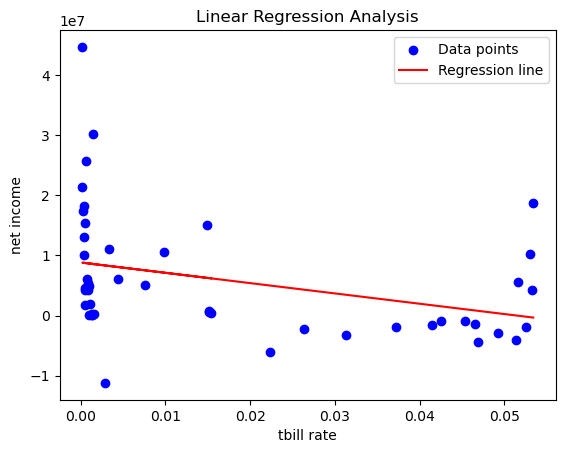

In [73]:
import matplotlib.pyplot as plt

# Create a scatter plot of the original data
plt.scatter(x, y, color='blue', label='Data points')

# Predict y values for the given x values
y_pred = model.predict(x)

# Plot the regression line
plt.plot(x, y_pred, color='red', label='Regression line')

# Add labels and title (optional)
plt.xlabel('tbill rate')
plt.ylabel('net income')
plt.title('Linear Regression Analysis')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [74]:
y2 = filtered_stats['net_income'].iloc[:-1].values
x2 = tbill_decimals['value'].iloc[:-1].values

from scipy.stats import pearsonr

correlation_coefficient, _ = pearsonr(x2, y2)
print(correlation_coefficient)

-0.3410109294767975


DAO income sensitive to broader crypto market volume (demand for services), and interest rate hikes (interest income)

In [75]:

tbilldf_yearly = tbill_timeseries.groupby(tbill_timeseries.index.year).mean()

tbilldf_yearly


tbilldf_after2020 = tbilldf_yearly[tbilldf_yearly.index >= 2020]

tbilldf_after2020_dec = tbilldf_after2020 / 100




C:\Users\brand\AppData\Local\Temp\ipykernel_10904\1503169913.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tbilldf_yearly = tbill_timeseries.groupby(tbill_timeseries.index.year).mean()


In [76]:
current_risk_free = tbilldf['value'].iloc[-1] / 100

In [77]:
tbilldf['value'] = tbilldf['value'] / 100
monthly_riskfree = tbilldf['value'].resample('M').mean()
monthly_riskfree_filtered = monthly_riskfree[monthly_riskfree.index > '2020-09-30']
monthly_riskfree_filtered

date
2020-10-31    0.0010
2020-11-30    0.0009
2020-12-31    0.0009
2021-01-31    0.0008
2021-02-28    0.0004
2021-03-31    0.0003
2021-04-30    0.0002
2021-05-31    0.0002
2021-06-30    0.0004
2021-07-31    0.0005
2021-08-31    0.0005
2021-09-30    0.0004
2021-10-31    0.0005
2021-11-30    0.0005
2021-12-31    0.0006
2022-01-31    0.0015
2022-02-28    0.0033
2022-03-31    0.0044
2022-04-30    0.0076
2022-05-31    0.0098
2022-06-30    0.0149
2022-07-31    0.0223
2022-08-31    0.0263
2022-09-30    0.0313
2022-10-31    0.0372
2022-11-30    0.0415
2022-12-31    0.0425
2023-01-31    0.0454
2023-02-28    0.0465
2023-03-31    0.0469
2023-04-30    0.0492
2023-05-31    0.0514
2023-06-30    0.0516
2023-07-31    0.0525
2023-08-31    0.0530
2023-09-30    0.0532
2023-10-31    0.0534
2023-11-30    0.0527
Freq: M, Name: value, dtype: float64

In [79]:
mkr_history['date'] = pd.to_datetime(mkr_history['date'])  # Convert the date column to datetime
mkr_history.set_index('date', inplace=True)  # Set the date column as the index


# Convert daily returns to monthly returns
monthly_returns = (1 + mkr_history['daily_returns']).resample('M').prod() - 1

monthly_returns

date
2020-10-31   -0.028804
2020-11-30    0.050060
2020-12-31    0.058699
2021-01-31    1.735713
2021-02-28    0.267340
2021-03-31    0.045618
2021-04-30    1.042532
2021-05-31   -0.224681
2021-06-30   -0.269578
2021-07-31    0.205653
2021-08-31    0.153771
2021-09-30   -0.335544
2021-10-31    0.065317
2021-11-30    0.297208
2021-12-31   -0.222940
2022-01-31   -0.166147
2022-02-28   -0.092824
2022-03-31    0.199554
2022-04-30   -0.285971
2022-05-31   -0.119879
2022-06-30   -0.337270
2022-07-31    0.233795
2022-08-31   -0.299227
2022-09-30   -0.058777
2022-10-31    0.233089
2022-11-30   -0.290014
2022-12-31   -0.191267
2023-01-31    0.214781
2023-02-28    0.243830
2023-03-31   -0.143360
2023-04-30    0.047233
2023-05-31   -0.091347
2023-06-30    0.068855
2023-07-31    0.815137
2023-08-31   -0.163626
2023-09-30    0.389526
2023-10-31   -0.039395
2023-11-30    0.090521
2023-12-31   -0.064612
Freq: M, Name: daily_returns, dtype: float64

In [80]:
monthly_risk_premium = monthly_returns - monthly_riskfree_filtered
monthly_risk_premium.fillna(method='ffill')

date
2020-10-31   -0.029804
2020-11-30    0.049160
2020-12-31    0.057799
2021-01-31    1.734913
2021-02-28    0.266940
2021-03-31    0.045318
2021-04-30    1.042332
2021-05-31   -0.224881
2021-06-30   -0.269978
2021-07-31    0.205153
2021-08-31    0.153271
2021-09-30   -0.335944
2021-10-31    0.064817
2021-11-30    0.296708
2021-12-31   -0.223540
2022-01-31   -0.167647
2022-02-28   -0.096124
2022-03-31    0.195154
2022-04-30   -0.293571
2022-05-31   -0.129679
2022-06-30   -0.352170
2022-07-31    0.211495
2022-08-31   -0.325527
2022-09-30   -0.090077
2022-10-31    0.195889
2022-11-30   -0.331514
2022-12-31   -0.233767
2023-01-31    0.169381
2023-02-28    0.197330
2023-03-31   -0.190260
2023-04-30   -0.001967
2023-05-31   -0.142747
2023-06-30    0.017255
2023-07-31    0.762637
2023-08-31   -0.216626
2023-09-30    0.336326
2023-10-31   -0.092795
2023-11-30    0.037821
2023-12-31    0.037821
Freq: M, dtype: float64

In [81]:
current_risk_free 

0.0527

In [82]:
annual_returns = pd.DataFrame(annual_returns)
annual_returns

,0
date,
2020,24.923285
2021,1.504522
2022,-0.801020
2023,0.751516


In [83]:
tbilldf_after2020_dec['value']

date
2020    0.003650
2021    0.000442
2022    0.020217
2023    0.050527
Name: value, dtype: float64

In [84]:
yearly_risk_premium = annual_returns[0] - tbilldf_after2020_dec['value']
     

yearly_risk_premium

date
2020    24.919635
2021     1.504080
2022    -0.821237
2023     0.700989
dtype: float64

In [85]:
average_yearly_risk_premium = yearly_risk_premium.mean()

average_yearly_risk_premium

6.575866965186776

In [86]:
dpi_history['daily_returns']
 

date
2020-10-31 00:00:00   -0.011163
2020-11-01 00:00:00   -0.054060
2020-11-02 00:00:00    0.032804
2020-11-03 00:00:00   -0.031549
2020-11-04 00:00:00   -0.020685
                         ...   
2023-12-22 00:00:00    0.010181
2023-12-23 00:00:00    0.071096
2023-12-24 00:00:00   -0.002502
2023-12-25 00:00:00    0.026007
2023-12-25 16:22:06    0.029130
Name: daily_returns, Length: 1152, dtype: float64

In [87]:
mkr_history.set_index(dpi_history.index, inplace=True)

cumulative approach

In [88]:
# Assuming df is your DataFrame and it's sorted by date
initial_value = dpi_history['price'].iloc[0]
final_value = dpi_history['price'].iloc[-1]
number_of_years = (dpi_history.index[-1] - dpi_history.index[0]).days / 365.25

cagr = (final_value / initial_value) ** (1 / number_of_years) - 1
cagr_percentage = cagr * 100

print(f"The CAGR is {cagr_percentage:.2f}%")


The CAGR is 13.42%


In [89]:
cumulative_risk_premium = cagr - current_risk_free

print(cumulative_risk_premium)

0.08147853842630967


Cost of Equity=Risk Free Rate+β×(Market Return−Risk Free Rate)

In [90]:
short_term_makerdao_cost_equity = current_risk_free + beta * average_yearly_risk_premium
long_term_makerdao_cost_equity = current_risk_free + beta * cumulative_risk_premium

In [102]:
monthly_betas = rolling_betas.resample('M').mean()


In [105]:
short_re_historical = monthly_riskfree_filtered + monthly_betas * monthly_risk_premium

short_re_historical

date
2020-10-31         NaN
2020-11-30    0.019135
2020-12-31    0.036431
2021-01-31    1.701825
2021-02-28    0.265901
2021-03-31    0.031232
2021-04-30    1.112448
2021-05-31   -0.262850
2021-06-30   -0.258164
2021-07-31    0.165001
2021-08-31    0.131365
2021-09-30   -0.275291
2021-10-31    0.046714
2021-11-30    0.283085
2021-12-31   -0.152902
2022-01-31   -0.096832
2022-02-28   -0.030559
2022-03-31    0.174666
2022-04-30   -0.219994
2022-05-31   -0.078545
2022-06-30   -0.284897
2022-07-31    0.206779
2022-08-31   -0.250120
2022-09-30   -0.043040
2022-10-31    0.232486
2022-11-30   -0.292081
2022-12-31   -0.146098
2023-01-31    0.198829
2023-02-28    0.217336
2023-03-31   -0.154278
2023-04-30    0.047959
2023-05-31   -0.032898
2023-06-30    0.056617
2023-07-31    0.350228
2023-08-31    0.036420
2023-09-30    0.101064
2023-10-31    0.044698
2023-11-30    0.061046
2023-12-31         NaN
Freq: M, dtype: float64

In [106]:
print(short_term_makerdao_cost_equity, long_term_makerdao_cost_equity)

4.9743148730925935 0.11368146277589455


Now, the cost of debt




In [107]:
stability_fees = {
     "ETH-A" : 0.0525,
     "ETH-B" : 0.0575,
     "ETH-C" : 0.05,
     "WSTETH-A" : 0.0525,
     "WBTC-A" : 0.0586,
     "Others" : sum([0.045,0.04,0.05,0.0466,0.025,0.028,0.0011,0.026,0.04,0.04,0.0561,0.0636,0.03,0.07]) / 14
    }

print(stability_fees)

{'ETH-A': 0.0525, 'ETH-B': 0.0575, 'ETH-C': 0.05, 'WSTETH-A': 0.0525, 'WBTC-A': 0.0586, 'Others': 0.04009999999999999}


In [108]:
from apis import mkr_vault_df

mkr_vault_df = mkr_vault_df.groupby(['period','collateral']).sum()

mkr_vault_df.index

MultiIndex([('2019-11',    'ETH-A'),
            ('2019-11',   'Others'),
            ('2019-12',    'ETH-A'),
            ('2019-12',   'Others'),
            ('2020-01',    'ETH-A'),
            ('2020-01',   'Others'),
            ('2020-02',    'ETH-A'),
            ('2020-02',   'Others'),
            ('2020-03',    'ETH-A'),
            ('2020-03',   'Others'),
            ...
            ('2023-11',    'ETH-C'),
            ('2023-11',   'Others'),
            ('2023-11',   'WBTC-A'),
            ('2023-11', 'WSTETH-B'),
            ('2023-12',    'ETH-A'),
            ('2023-12',    'ETH-B'),
            ('2023-12',    'ETH-C'),
            ('2023-12',   'Others'),
            ('2023-12',   'WBTC-A'),
            ('2023-12', 'WSTETH-B')],
           names=['period', 'collateral'], length=233)

In [109]:
total_weighted_fee = 0
total_revenue = mkr_vault_df['revenues'].sum()

for index, row in mkr_vault_df.iterrows():
    collateral_type = row.name[1]  # Access the 'collateral' part of the MultiIndex
    fee = stability_fees.get(collateral_type, stability_fees['Others'])  # Use the collateral type to get the fee
    weighted_fee = fee * row['revenues']
    total_weighted_fee += weighted_fee

weighted_average_stability_fee = total_weighted_fee / total_revenue

print("Weighted Average Stability Fee:", weighted_average_stability_fee)


Weighted Average Stability Fee: 0.051358207514736826


In [110]:
dsr_rate = 0.05

mkrdao_cost_debt = weighted_average_stability_fee - dsr_rate

mkrdao_cost_debt


0.0013582075147368228

In [112]:
mf10 = mf9.merge(monthly_betas.to_frame(), left_index=True, right_index=True, how='left')
mf10 = mf10.rename(columns={0:'beta'})
mf10['beta'] = mf10['beta'].fillna(method='bfill')
mf10

,equity,supply,bookval,price,net_income,eps,price_to_earnings,roe,average_assets,roa,debt_to_equity,debt_ratio,current_ratio,revenue,net_profit_margin,price_to_sales,beta
2020-10-31,2.248864e+06,913671.357103,2.595770,518.485847,4.924139e+06,5.389399,96.204765,2.189612,9.027319e+08,0.005455,464.939412,0.997833,1.002168,4.924139e+06,1.000000,96.204765,0.370921
2020-11-30,3.501016e+06,909439.212415,3.850017,544.441375,5.482194e+06,6.028104,90.317182,1.565886,9.897468e+08,0.005539,287.671039,0.996463,1.003537,5.482194e+06,1.000000,90.317182,0.370921
2020-12-31,4.003503e+06,905718.304111,4.420283,576.399341,4.264751e+06,4.708695,122.411707,1.065255,1.099184e+09,0.003880,273.554089,0.996358,1.003658,4.264751e+06,1.000000,122.411707,0.614729
2021-01-31,4.310946e+06,901603.814669,4.781478,1576.862980,6.108469e+06,6.775115,232.743357,1.416967,1.414911e+09,0.004317,328.123419,0.996953,1.003055,6.133869e+06,0.995859,231.779580,0.980467
2021-02-28,7.837552e+06,900590.252118,8.704910,1998.421053,1.309423e+07,14.539612,137.446655,1.670704,2.079863e+09,0.006296,269.724031,0.996232,1.003751,1.329423e+07,0.984956,135.378892,0.994609
2021-03-31,1.531653e+07,902701.360606,16.967558,2089.585810,1.745882e+07,19.340642,108.041184,1.139868,2.748360e+09,0.006352,181.709445,0.994427,1.005568,1.745882e+07,1.000000,108.041184,0.682538
2021-04-30,2.463653e+07,901855.121624,27.316706,4268.045186,2.135812e+07,23.682424,180.219947,0.866929,3.398175e+09,0.006285,137.841646,0.992750,1.007255,2.541912e+07,0.840238,151.427710,1.067077
2021-05-31,3.452583e+07,902469.913467,38.258058,3309.097200,4.466481e+07,49.491749,66.861593,1.293664,4.474431e+09,0.009982,129.232467,0.992284,1.007576,4.775376e+07,0.935315,62.536662,1.169731
2021-06-30,4.318891e+07,901975.090831,47.883018,2417.036898,1.817395e+07,20.149060,119.957801,0.420801,4.971685e+09,0.003655,114.337911,0.991313,1.008214,2.126020e+07,0.854834,102.544034,0.957721
2021-07-31,4.879691e+07,901054.729233,54.155211,2914.107727,4.513031e+06,5.008609,581.819743,0.092486,5.375861e+09,0.000839,109.184320,0.990923,1.008272,9.534037e+06,0.473360,275.410148,0.801846


In [113]:
e1 = mf10['price'] * mf10['supply']
d1 = abs(monthly_liabilities)
v1 = e1 + d1
short_re1 = short_re_historical
rd1 = mkrdao_cost_debt

monthly_wacc = ((e1/v1) * short_re1) + ((d1/v1) * rd1)

print(monthly_wacc)

2020-07-31         NaN
2020-08-31         NaN
2020-09-30         NaN
2020-10-31         NaN
2020-11-30    0.007300
2020-12-31    0.012680
2021-01-31    0.854925
2021-02-28    0.124328
2021-03-31    0.013557
2021-04-30    0.593486
2021-05-31   -0.104889
2021-06-30   -0.078234
2021-07-31    0.055388
2021-08-31    0.046181
2021-09-30   -0.065860
2021-10-31    0.011985
2021-11-30    0.070616
2021-12-31   -0.028493
2022-01-31   -0.014676
2022-02-28   -0.003258
2022-03-31    0.031161
2022-04-30   -0.028855
2022-05-31   -0.011019
2022-06-30   -0.031056
2022-07-31    0.028341
2022-08-31   -0.022420
2022-09-30   -0.002796
2022-10-31    0.029021
2022-11-30   -0.026940
2022-12-31   -0.010966
2023-01-31    0.021163
2023-02-28    0.027621
2023-03-31   -0.014340
2023-04-30    0.006589
2023-05-31   -0.002357
2023-06-30    0.007895
2023-07-31    0.070681
2023-08-31    0.006885
2023-09-30    0.020896
2023-10-31    0.009432
2023-11-30    0.013706
2023-12-31         NaN
Freq: M, dtype: float64


In [140]:
e = market_value
d = abs(liabilities)
v = e + d
short_re = short_term_makerdao_cost_equity
long_re = long_term_makerdao_cost_equity # need to recalculate maybe with other benchmark, or maybe short_re better.  This also impacts beta
rd = mkrdao_cost_debt

wacc = ((e/v) * short_re) + ((d/v) * rd)

print(wacc.tail())

period
2023-12-21    0.996295
2023-12-22    0.994129
2023-12-23    0.990127
2023-12-24    0.990186
2023-12-25    0.990185
Name: balance, dtype: float64


In [116]:
print('market value of equity:', e)
print('market value of debt:', d)
print('value of financing:', v)
print('cost of equity:', short_re)
print('cost of debt:', rd)
print('proportion of debt financing:', (d / v)*100)
print('proportion of equity financing:', (e / v) * 100)
print('wacc:',wacc)

market value of equity: 1308788925
market value of debt: period
2020-07-01    1.446052e+08
2020-07-02    1.496232e+08
2020-07-03    1.610566e+08
2020-07-04    1.696600e+08
2020-07-05    1.731027e+08
                  ...     
2023-12-21    5.232883e+09
2023-12-22    5.247159e+09
2023-12-23    5.273693e+09
2023-12-24    5.273299e+09
2023-12-25    5.273306e+09
Name: balance, Length: 1273, dtype: float64
value of financing: period
2020-07-01    1.453394e+09
2020-07-02    1.458412e+09
2020-07-03    1.469846e+09
2020-07-04    1.478449e+09
2020-07-05    1.481892e+09
                  ...     
2023-12-21    6.541671e+09
2023-12-22    6.555948e+09
2023-12-23    6.582482e+09
2023-12-24    6.582088e+09
2023-12-25    6.582095e+09
Name: balance, Length: 1273, dtype: float64
cost of equity: 4.9743148730925935
cost of debt: 0.0013582075147368228
proportion of debt financing: period
2020-07-01     9.949484
2020-07-02    10.259324
2020-07-03    10.957384
2020-07-04    11.475540
2020-07-05    11.681200

In [117]:
#linear regression and r value for net income and interest rates

from sklearn.linear_model import LinearRegression
#We do .iloc[:-1] because is API and month is not done; we use previous full month
x = tbill_decimals['value'].iloc[:-1].values.reshape(-1, 1)
y = filtered_stats['lending_income'].iloc[:-1].values

model = LinearRegression()
model.fit(x, y)


r_squared = model.score(x, y)

print("R^2:", r_squared)



R^2: 0.0075252668994305605


In [118]:
monthly_growth_rate = monthly_stats.select_dtypes(include='number').pct_change()


monthly_growth_rate['trading_income'] = monthly_growth_rate['trading_income'].fillna(0)
monthly_growth_rate.replace([np.inf, -np.inf], np.nan, inplace=True)
monthly_growth_rate['liquidation_income'] = monthly_growth_rate['liquidation_income'].fillna(0)


monthly_growth_rate.tail()

,expenses,lending_income,liquidation_income,month,net_income,trading_income,value,year
period,,,,,,,,
2023-08-01,0.238085,2.209315,13.787330,0.142857,-6.350414,0.0,0.152081,0.0
2023-09-01,-0.678943,-0.621740,-0.953119,0.125000,-0.580752,0.0,0.049275,0.0
2023-10-01,1.396991,2.547001,-1.000000,0.111111,3.393852,0.0,-0.033361,0.0
2023-11-01,-0.227947,0.758922,0.000000,0.100000,1.163934,0.0,0.000604,0.0
2023-12-01,-0.535912,-0.887633,-1.000000,0.090909,-0.939130,0.0,-0.017052,0.0


Liquidity Ratios

In [119]:
from apis import filtered_BTC_history

# Convert the tz-aware index to tz-naive
filtered_BTC_history.index = filtered_BTC_history.index.tz_localize(None)

# Now try merging
merged_data = pd.merge(filtered_BTC_history, tbill_decimals, left_index=True, right_index=True)

merged_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,value
2023-06-01,27218.412109,31389.539062,24797.167969,30477.251953,481734214225,0.0,0.0,0.0516
2023-07-01,30471.847656,31814.515625,28934.294922,29230.111328,382224489090,0.0,0.0,0.0525
2023-08-01,29230.873047,30176.796875,25409.111328,25931.472656,437724169499,0.0,0.0,0.0530
2023-09-01,25934.021484,27488.763672,24930.296875,26967.916016,337637313742,0.0,0.0,0.0532
2023-10-01,26967.396484,35150.433594,26558.320312,34667.781250,476425634860,0.0,0.0,0.0534


In [120]:
filtered_stats['net_income'].tail()

period
2023-07-01   -1.905054e+06
2023-08-01    1.019283e+07
2023-09-01    4.273326e+06
2023-10-01    1.877636e+07
2023-11-01    4.063081e+07
Name: net_income, dtype: float64

In [121]:
#linear regression and r value for net income and interest rates

from sklearn.linear_model import LinearRegression
#We do .iloc[:-1] because is API and month is not done; we use previous full month
x = merged_data[['Close', 'value']].values#.reshape(-1, 1)
y = filtered_stats['net_income'].iloc[:-1].values

model = LinearRegression()
model.fit(x, y)


r_squared = model.score(x, y)

print("R^2:", r_squared)



R^2: 0.36334128147563793


In [122]:
"""
correlation_coefficient, _ = pearsonr(x, y)
print(correlation_coefficient)
"""

'\ncorrelation_coefficient, _ = pearsonr(x, y)\nprint(correlation_coefficient)\n'

In [123]:
ttm_data

year                                 8092
quarter                          Q1Q2Q3Q4
expenses                 -74118554.391347
lending_income           139631926.405038
liquidation_income          752182.063317
month                                1404
net_income                 66509403.16049
trading_income              243849.083482
value                 245635468353.169922
dtype: object

In [124]:
mkr_history

,price,daily_returns
date,,
2020-10-31 00:00:00,518.485847,-0.028804
2020-11-01 00:00:00,523.558507,0.009784
2020-11-02 00:00:00,538.866881,0.029239
2020-11-03 00:00:00,523.434663,-0.028638
2020-11-04 00:00:00,521.372827,-0.003939
...,...,...
2023-12-22 00:00:00,1322.099813,0.028366
2023-12-23 00:00:00,1390.922025,0.052055
2023-12-24 00:00:00,1383.103655,-0.005621


In [125]:
mkr_annual_returns = mkr_history.groupby(mkr_history.index.year).apply(calculate_annual_return)

excess_return = mkr_annual_returns - tbilldf_after2020_dec['value']

mkr_avg_excess_return = excess_return.mean()

In [126]:
mkr_avg_excess_return

1.2413411601001199

In [127]:
def fetch_dpi_historical_data(api_url):
    response = requests.get(api_url)
    dpi_history = pd.DataFrame()

    if response.status_code == 200:
        # Parse the JSON response
        dpi_historical_pricedata = response.json()
        # Extract the 'prices' data
        dpi_historical_price = dpi_historical_pricedata['prices']
        # Create a DataFrame with a 'timestamp' column instead of 'date'
        dpi_history = pd.DataFrame(dpi_historical_price, columns=['timestamp', 'price'])
        # Convert the 'timestamp' column from UNIX timestamps in milliseconds to datetime objects
        dpi_history['date'] = pd.to_datetime(dpi_history['timestamp'], unit='ms')
        # Set the 'date' column as the index of the DataFrame
        dpi_history.set_index('date', inplace=True)
        # Drop the original 'timestamp' column
        dpi_history.drop(columns='timestamp', inplace=True)
        return dpi_history
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return dpi_history  # Return an empty DataFrame in case of failure

In [128]:
# Define the API endpoint and parameters
dpi_historical_api = "https://api.coingecko.com/api/v3/coins/defipulse-index/market_chart?vs_currency=usd&days=1152&interval=daily"

dpi_history = fetch_dpi_historical_data(dpi_historical_api)

dpi_history

,price
date,
2020-10-30 00:00:00,66.618913
2020-10-31 00:00:00,65.875278
2020-11-01 00:00:00,62.314059
2020-11-02 00:00:00,64.358233
2020-11-03 00:00:00,62.327817
...,...
2023-12-22 00:00:00,86.801483
2023-12-23 00:00:00,92.972706
2023-12-24 00:00:00,92.740128


In [129]:
dpi_history['daily_returns'] = dpi_history['price'].pct_change().dropna()

dpi_history = dpi_history.iloc[1:] #first day of trading nothing to get for return

# Convert the 'date' column from UNIX timestamps in milliseconds to datetime objects
#dpi_history['date'] = pd.to_datetime(dpi_history['date'], unit='ms')

In [130]:
def fetch_data_from_api(api_url, params=None):
    response = requests.get(api_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if 'rows' in data['result']:
            return pd.DataFrame(data['result']['rows'])
        return data
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return pd.DataFrame()  # or an empty dict



In [131]:
api_key = "NB6wsLRGqoVVQaLVuwk9mFB3kDssFVGK"

url='https://api.dune.com/api/v1/query/907852/results'
params = {"api_key": api_key }

daidf = fetch_data_from_api(url, params)

In [132]:
daidf

,dt,maturity,outflow,total_period
0,2023-12-16,1-day,3.140129e+08,3.689678e+09
1,2023-12-16,1-month,4.455297e+07,3.689678e+09
2,2023-12-16,1-week,2.567279e+08,3.689678e+09
3,2023-12-16,1-year,2.694638e+09,3.689678e+09
4,2023-12-16,1-block,3.140129e+08,3.689678e+09
...,...,...,...,...
7753,2020-06-02,1-block,9.495337e+06,1.110190e+08
7754,2020-06-02,3-months,2.069784e+06,1.110190e+08
7755,2020-06-02,1-month,1.402854e+06,1.110190e+08
7756,2020-06-02,1-week,7.934061e+06,1.110190e+08


In [133]:
average_block_time_seconds = 15
# Assuming 1 block is a very short period, like 15 seconds
# Convert this to a fraction of a day (e.g., 15 seconds / total seconds in a day)
average_block_time_days = average_block_time_seconds / (24 * 60 * 60)

# Convert maturity to a numeric value (e.g., days)
maturity_days = {
    '1-day': 1,
    '1-week': 7,
    '1-month': 30,  # Approximate
    '1-year': 365,
    '1-block': average_block_time_days  # Short-term, but meaningful for financial analysis
}

daidf['maturity_days'] = daidf['maturity'].map(maturity_days)

# Calculate weight for each entry
daidf['weight'] = daidf['outflow'] / daidf['total_period']

# Calculate weighted maturity for each entry
daidf['weighted_maturity'] = daidf['maturity_days'] * daidf['weight']

# Group by date and calculate the WAM for each date
grouped = daidf.groupby('dt')
wam_by_date = grouped.apply(lambda x: (x['weighted_maturity'].sum()))

print(wam_by_date)

dt
2020-06-02    266.026710
2020-06-03    265.211324
2020-06-04    265.194702
2020-06-05    265.524856
2020-06-06    265.267360
                 ...    
2023-12-12    265.747036
2023-12-13    265.356835
2023-12-14    264.716216
2023-12-15    265.814923
2023-12-16    267.500437
Length: 1293, dtype: float64


In [134]:
daidf

,dt,maturity,outflow,total_period,maturity_days,weight,weighted_maturity
0,2023-12-16,1-day,3.140129e+08,3.689678e+09,1.000000,0.085106,0.085106
1,2023-12-16,1-month,4.455297e+07,3.689678e+09,30.000000,0.012075,0.362251
2,2023-12-16,1-week,2.567279e+08,3.689678e+09,7.000000,0.069580,0.487060
3,2023-12-16,1-year,2.694638e+09,3.689678e+09,365.000000,0.730318,266.566005
4,2023-12-16,1-block,3.140129e+08,3.689678e+09,0.000174,0.085106,0.000015
...,...,...,...,...,...,...,...
7753,2020-06-02,1-block,9.495337e+06,1.110190e+08,0.000174,0.085529,0.000015
7754,2020-06-02,3-months,2.069784e+06,1.110190e+08,NaN,0.018644,NaN
7755,2020-06-02,1-month,1.402854e+06,1.110190e+08,30.000000,0.012636,0.379085
7756,2020-06-02,1-week,7.934061e+06,1.110190e+08,7.000000,0.071466,0.500260


In [135]:

# Ensure 'dt' is a DateTime index
daidf['dt'] = pd.to_datetime(daidf['dt'])
daidf.set_index('dt', inplace=True)

# Now perform the groupby operation
wam_by_date = daidf.groupby(daidf.index.date).sum()

# Display the result
print(wam_by_date.iloc[-1])


outflow              3.689678e+09
total_period         2.213807e+10
maturity_days        4.030002e+02
weight               1.000000e+00
weighted_maturity    2.675004e+02
Name: 2023-12-16, dtype: float64


C:\Users\brand\AppData\Local\Temp\ipykernel_10904\2870035675.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wam_by_date = daidf.groupby(daidf.index.date).sum()


In [136]:
std_of_mkr = mkr_history['price'].pct_change().dropna().std(axis=0) 
std_of_mkr

0.05788567158392367

In [137]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import requests

def fetch_data_from_api(api_url, params=None):
    response = requests.get(api_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if 'rows' in data['result']:
            return pd.DataFrame(data['result']['rows'])
        return data
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return pd.DataFrame()  # or an empty dict

api_key = "NB6wsLRGqoVVQaLVuwk9mFB3kDssFVGK"

dai_maturity_url='https://api.dune.com/api/v1/query/907852/results'
dmuparams = {"api_key": api_key }

daidf = fetch_data_from_api(dai_maturity_url, dmuparams)

daidf['dt'] = pd.to_datetime(daidf['dt'])
daidf.set_index('dt', inplace=True)


In [138]:
average_block_time_seconds = 15
# Assuming 1 block is a very short period, like 15 seconds
# Convert this to a fraction of a day (e.g., 15 seconds / total seconds in a day)
average_block_time_days = average_block_time_seconds / (24 * 60 * 60)

# Convert maturity to a numeric value (e.g., days)
maturity_days = {
    '1-day': 1,
    '1-week': 7,
    '1-month': 30,  # Approximate
    '1-year': 365,
    '1-block': average_block_time_days  # Short-term, but meaningful for financial analysis
}

daidf['maturity_days'] = daidf['maturity'].map(maturity_days)

# Calculate weight for each entry
daidf['weight'] = daidf['outflow'] / daidf['total_period']

# Calculate weighted maturity for each entry
daidf['weighted_maturity'] = daidf['maturity_days'] * daidf['weight']

# Group by date and calculate the WAM for each date
grouped = daidf.groupby('dt')
wam_by_date = grouped.apply(lambda x: (x['weighted_maturity'].sum()))

print(wam_by_date.iloc[-1])

267.5004368068309


In [145]:
# Display the result
current_wam = wam_by_date.iloc[-1]

std_of_mkr = mkr_history['price'].pct_change().dropna().std(axis=0) 


# BSM valuation of equity as a call option
def equity_as_call_option(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_value = (S * np.exp(-q * T) * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    return call_value

# Example inputs
debt_obligation = abs(liabilities.iloc[-1]) 
time_to_maturity = float(current_wam/365)  # Time to maturity in years
risk_free_rate = float(current_risk_free)  # Risk-free interest rate
volatility = float(std_of_assets)  # Estimated volatility of the DAO's token price

# Calculate equity value as a call option
value_of_assets = assets.iloc[-1]
equity_value = equity_as_call_option(value_of_assets, debt_obligation, time_to_maturity, risk_free_rate, volatility)

print(f"The value of equity as a call option on assets is: {equity_value}")
print(f"The market value of equity is: {market_value}")

The value of equity as a call option on assets is: 252976466.13528633
The market value of equity is: 1308788925


In [149]:
price_per_bsm = equity_value / mf10['supply'].iloc[-1]

price_per_bsm

bsm_premium = mf10['price'].iloc[-1] - price_per_bsm

bsm_premium

1146.1545649481784

In [144]:
print(value_of_assets, 
debt_obligation, 
time_to_maturity,
risk_free_rate, 
volatility) 

5326496052.910222 5273305740.939491 267.5004368068309 0.0527 0.01065044510269684


In [150]:
current_assets

period
2020-07-01 00:00:00.000    1.448054e+08
2020-07-02 00:00:00.000    1.498251e+08
2020-07-03 00:00:00.000    1.612606e+08
2020-07-04 00:00:00.000    1.698664e+08
2020-07-05 00:00:00.000    1.733122e+08
                               ...     
2023-12-21 00:00:00.000    2.848023e+09
2023-12-22 00:00:00.000    2.862066e+09
2023-12-23 00:00:00.000    2.888348e+09
2023-12-24 00:00:00.000    2.887940e+09
2023-12-25 00:00:00.000    2.887990e+09
Name: balance, Length: 1273, dtype: float64

In [ ]:
#monthly_betas = rolling_betas.resample('M').mean()


In [170]:
mf11 = mf10.merge(monthly_wacc.to_frame(), left_index=True, right_index=True, how='left')
mf11 = mf11.rename(columns={0:'wacc'})

mf11['wacc'] = mf11['wacc'].fillna(method='bfill')

full_metrics = mf11.fillna(method='ffill')

full_metrics

,equity,supply,bookval,price,net_income,eps,price_to_earnings,roe,average_assets,roa,debt_to_equity,debt_ratio,current_ratio,revenue,net_profit_margin,price_to_sales,beta,wacc
2020-10-31,2.248864e+06,913671.357103,2.595770,518.485847,4.924139e+06,5.389399,96.204765,2.189612,9.027319e+08,0.005455,464.939412,0.997833,1.002168,4.924139e+06,1.000000,96.204765,0.370921,0.007300
2020-11-30,3.501016e+06,909439.212415,3.850017,544.441375,5.482194e+06,6.028104,90.317182,1.565886,9.897468e+08,0.005539,287.671039,0.996463,1.003537,5.482194e+06,1.000000,90.317182,0.370921,0.007300
2020-12-31,4.003503e+06,905718.304111,4.420283,576.399341,4.264751e+06,4.708695,122.411707,1.065255,1.099184e+09,0.003880,273.554089,0.996358,1.003658,4.264751e+06,1.000000,122.411707,0.614729,0.012680
2021-01-31,4.310946e+06,901603.814669,4.781478,1576.862980,6.108469e+06,6.775115,232.743357,1.416967,1.414911e+09,0.004317,328.123419,0.996953,1.003055,6.133869e+06,0.995859,231.779580,0.980467,0.854925
2021-02-28,7.837552e+06,900590.252118,8.704910,1998.421053,1.309423e+07,14.539612,137.446655,1.670704,2.079863e+09,0.006296,269.724031,0.996232,1.003751,1.329423e+07,0.984956,135.378892,0.994609,0.124328
2021-03-31,1.531653e+07,902701.360606,16.967558,2089.585810,1.745882e+07,19.340642,108.041184,1.139868,2.748360e+09,0.006352,181.709445,0.994427,1.005568,1.745882e+07,1.000000,108.041184,0.682538,0.013557
2021-04-30,2.463653e+07,901855.121624,27.316706,4268.045186,2.135812e+07,23.682424,180.219947,0.866929,3.398175e+09,0.006285,137.841646,0.992750,1.007255,2.541912e+07,0.840238,151.427710,1.067077,0.593486
2021-05-31,3.452583e+07,902469.913467,38.258058,3309.097200,4.466481e+07,49.491749,66.861593,1.293664,4.474431e+09,0.009982,129.232467,0.992284,1.007576,4.775376e+07,0.935315,62.536662,1.169731,-0.104889
2021-06-30,4.318891e+07,901975.090831,47.883018,2417.036898,1.817395e+07,20.149060,119.957801,0.420801,4.971685e+09,0.003655,114.337911,0.991313,1.008214,2.126020e+07,0.854834,102.544034,0.957721,-0.078234
2021-07-31,4.879691e+07,901054.729233,54.155211,2914.107727,4.513031e+06,5.008609,581.819743,0.092486,5.375861e+09,0.000839,109.184320,0.990923,1.008272,9.534037e+06,0.473360,275.410148,0.801846,0.055388


In [202]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'full_metrics' is your DataFrame with the financial metrics
min_max_scaler = MinMaxScaler()
metrics_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(full_metrics), columns=full_metrics.columns)

standard_scaler = StandardScaler()
metrics_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(full_metrics), columns=full_metrics.columns, index=full_metrics.index)

# Define the function to score each metric based on its Z-score
def score_metric(value, is_higher_better=True, max_score=3):  # Changed max_score to 3
    if is_higher_better:
        return max(1, min(max_score, (value + 3) / 6 * max_score))
    else:
        return max(1, min(max_score, (-value + 3) / 6 * max_score))

# Define the original weights for each metric
weights = {
    'current_ratio': 0.20,  # High importance for liquidity
    'debt_to_equity': 0.15,  # Financial leverage and long-term solvency
    'debt_ratio': 0.10,  # Solvency and financial structure
    'roa': 0.15,  # Operational efficiency
    'net_profit_margin': 0.15,  # Profitability efficiency
    'bookval': 0.10,  # Net asset value
    'net_income': 0.10,  # Overall profitability
    'revenue': 0.05,  # Operational scale and market position
    # Reduced focus or excluded metrics
    'equity': 0.0,  # Less emphasis
    'supply': 0.0,  # Less emphasis
    'price': 0.0,  # Less emphasis
    'eps': 0.0,  # Less emphasis
    'price_to_earnings': 0.0,  # Less emphasis
    'roe': 0.0,  # Less emphasis
    'price_to_sales': 0.0,  # Less emphasis
    'beta': 0.0,  # Less emphasis
    'wacc': 0.0   # Less emphasis
}

# Calculating the total sum of weights
total_weight = sum(weights.values())

# Scaling down each weight so that total sum becomes 1.0
scaled_weights = {k: v / total_weight for k, v in weights.items()}

# Define which metrics are considered 'higher is better'
higher_is_better_metrics = [
    'roa',
    'current_ratio',
    'revenue',
    'net_profit_margin',
    'bookval',
    'net_income'
]

# Score each metric using Z-scores and the scaled weights
for metric in scaled_weights:
    higher_is_better = metric in higher_is_better_metrics
    metrics_standard_scaled[metric + '_score'] = metrics_standard_scaled[metric].apply(score_metric, args=(higher_is_better,))

# Multiply scores by their scaled weights and calculate the overall financial health score
for metric in scaled_weights:
    metrics_standard_scaled[metric + '_weighted_score'] = metrics_standard_scaled[metric + '_score'] * scaled_weights[metric]

metrics_standard_scaled['financial_health_score'] = metrics_standard_scaled[[col for col in metrics_standard_scaled.columns if 'weighted_score' in col]].sum(axis=1)

# Normalize the overall score to a 1 to 3 scale
max_possible_score = sum(scaled_weights.values()) * 3
metrics_standard_scaled['normalized_financial_health_score'] = metrics_standard_scaled['financial_health_score'] / max_possible_score * 3

# Categorize the normalized score into 3 categories
def categorize_score(score):
    if score >= 2.5:
        return 'good'
    elif score >= 1.5:
        return 'okay'
    else:
        return 'bad'

metrics_standard_scaled['financial_health_category'] = metrics_standard_scaled['normalized_financial_health_score'].apply(categorize_score)

# Display the results
print(metrics_standard_scaled[['normalized_financial_health_score', 'financial_health_category']])


            normalized_financial_health_score financial_health_category
2020-10-31                           1.484965                       bad
2020-11-30                           1.491594                       bad
2020-12-31                           1.437773                       bad
2021-01-31                           1.460902                       bad
2021-02-28                           1.559659                      okay
2021-03-31                           1.619512                      okay
2021-04-30                           1.703148                      okay
2021-05-31                           1.970283                      okay
2021-06-30                           1.677058                      okay
2021-07-31                           1.526637                      okay
2021-08-31                           1.481228                       bad
2021-09-30                           1.573075                      okay
2021-10-31                           1.499168                   

In [200]:
# Verify the total sum of weights
sum_of_weights = sum(weights.values())
print(f"Total sum of weights: {sum_of_weights}")
print(scaled_weights)

Total sum of weights: 1.0
{'current_ratio': 0.2, 'debt_to_equity': 0.15, 'debt_ratio': 0.1, 'roa': 0.15, 'net_profit_margin': 0.15, 'bookval': 0.1, 'net_income': 0.1, 'revenue': 0.05, 'equity': 0.0, 'supply': 0.0, 'price': 0.0, 'eps': 0.0, 'price_to_earnings': 0.0, 'roe': 0.0, 'price_to_sales': 0.0, 'beta': 0.0, 'wacc': 0.0}


In [169]:
metrics_standard_scaled.columns


Index(['equity', 'supply', 'bookval', 'price', 'net_income', 'eps',
       'price_to_earnings', 'roe', 'average_assets', 'roa', 'debt_to_equity',
       'debt_ratio', 'current_ratio', 'revenue', 'net_profit_margin',
       'price_to_sales', 'beta', 'wacc', 'equity_score', 'supply_score',
       'bookval_score', 'price_score', 'net_income_score', 'eps_score',
       'price_to_earnings_score', 'roe_score', 'average_assets_score',
       'roa_score', 'debt_to_equity_score', 'debt_ratio_score',
       'current_ratio_score', 'revenue_score', 'net_profit_margin_score',
       'price_to_sales_score', 'beta_score', 'wacc_score',
       'equity_weighted_score', 'supply_weighted_score',
       'bookval_weighted_score', 'price_weighted_score',
       'net_income_weighted_score', 'eps_weighted_score',
       'price_to_earnings_weighted_score', 'roe_weighted_score',
       'average_assets_weighted_score', 'roa_weighted_score',
       'debt_to_equity_weighted_score', 'debt_ratio_weighted_score',
   

In [176]:
metrics_standard_scaled.to_excel("metrics.xlsx", index=True)